In [110]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
%matplotlib inline

display(tf.__version__)

display(keras.__version__)

'2.2.0'

'2.3.0-tf'

Context
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."

Zalando seeks to replace the original MNIST dataset

Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


Labels

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot


TL;DR

Each row is a separate image
Column 1 is the class label.
Remaining columns are pixel numbers (784 total).
Each value is the darkness of the pixel (1 to 255)
Acknowledgements
Original dataset was downloaded from https://github.com/zalandoresearch/fashion-mnist

Dataset was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

License
The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

In [111]:
train = pd.read_csv('/Users/seed/Desktop/git/Deep_learning/fashion_MNIST/Data/.fashion-mnist_test.csv')

FileNotFoundError: [Errno 2] File /Users/seed/Desktop/git/Deep_learning/fashion_MNIST/Data/.fashion-mnist_test.csv does not exist: '/Users/seed/Desktop/git/Deep_learning/fashion_MNIST/Data/.fashion-mnist_test.csv'

In [ ]:
train_x = train[list(train.columns)[1:]].values
train_y = train['label'].values

## normalize and reshape the predictors  
train_x = train_x / 255

## create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

## reshape the inputs
train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

As we can see, the first column represents the target value (y) and the rest are the input features. Now let's going to split the train and the test dataset in X_train, X_test, y_train and y_test

In [100]:
""""X_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]

X_test, y_test = test.iloc[:, 1:], test.iloc[:, 0]

print('X_train shape: {}\nX_test shape: {}\ny_train shape: {}\ny_test shape: {}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))"""

'"X_train, y_train = train.iloc[:, 1:], train.iloc[:, 0]\n\nX_test, y_test = test.iloc[:, 1:], test.iloc[:, 0]\n\nprint(\'X_train shape: {}\nX_test shape: {}\ny_train shape: {}\ny_test shape: {}\'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))'

In [101]:
"""per_train = round((X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]))*100, 2)
per_test = round((X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]))*100, 2)

print('Percentage of data in train = {} %\nPercentage of data in test = {} %'.format(per_test, per_train))"""

"per_train = round((X_test.shape[0]/(X_train.shape[0]+X_test.shape[0]))*100, 2)\nper_test = round((X_train.shape[0]/(X_train.shape[0]+X_test.shape[0]))*100, 2)\n\nprint('Percentage of data in train = {} %\nPercentage of data in test = {} %'.format(per_test, per_train))"

Usually I take about the 20 % of data to make and in where I get the dataset the train ans test sets were splitted in the percentage above showed. So we are going to take the 5.71 % of total data of the training set to make a validation test together with the training.

# # SEGUN LIBRO A PARTIR DE AQUI

In [102]:
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

print("X_train.shape = {}\nX_test.shape = {}\ny_train.shape = {}\ny_test.shape = {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train.shape = (60000, 28, 28)
X_test.shape = (10000, 28, 28)
y_train.shape = (60000,)
y_test.shape = (10000,)


Now we must escalate the features in order to get values between 0 and 1 to use gradient descent, and at the same time we are going to create a validation test

In [103]:
X_val, X_train_b = X_train[0:5000]/255, X_train[5000:]/255
y_val, y_train_b = y_train[0:5000], y_train[5000:]

Now let's going to see the unique values of the y in order to know the number of classes that we have in this problem

In [104]:
clothes_names = {0:'T-shirt/top', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle boot'}

clothes_names

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

### Creating the neural network

In [105]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [107]:
training = model.fit(x=X_train_b, y=y_train_b, validation_data=(X_val, y_val), epochs=40)

Epoch 1/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7226 - accuracy: 0.7625 - val_loss: 0.5309 - val_accuracy: 0.8094
Epoch 2/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4889 - accuracy: 0.8303 - val_loss: 0.4437 - val_accuracy: 0.8464
Epoch 3/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4439 - accuracy: 0.8431 - val_loss: 0.4311 - val_accuracy: 0.8522
Epoch 4/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4188 - accuracy: 0.8530 - val_loss: 0.3933 - val_accuracy: 0.8630
Epoch 5/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3995 - accuracy: 0.8592 - val_loss: 0.3888 - val_accuracy: 0.8612
Epoch 6/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3809 - accuracy: 0.8665 - val_loss: 0.3827 - val_accuracy: 0.8634
Epoch 7/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3667 - accuracy: 0.8710 - val_loss: 0.3684 - val_accuracy:

### Visualizing the perfomance of the model

Text(0, 0.5, 'metrics value')

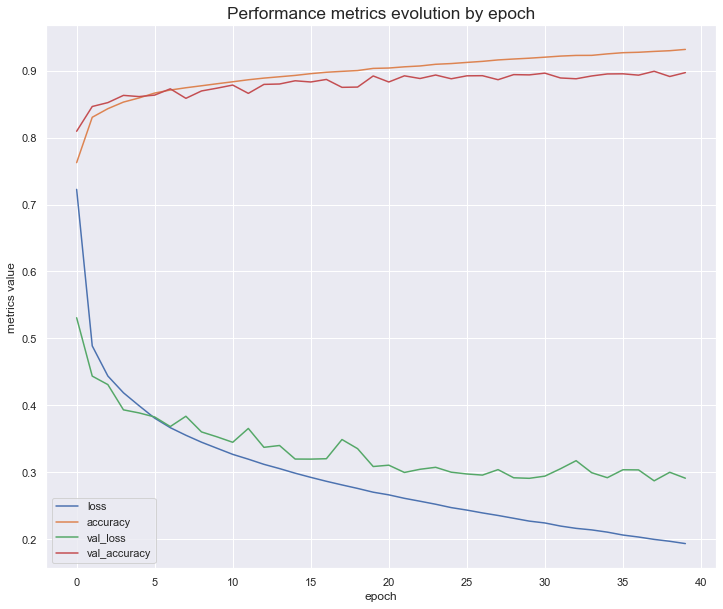

In [108]:
pd.DataFrame(training.history).plot(figsize=(12,10))
plt.title("Performance metrics evolution by epoch", size='xx-large')
plt.xlabel("epoch")
plt.ylabel("metrics value")

In [109]:
model.evaluate(X_test/255, y_test) # Remember, we must scale the data

313/313 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 0.8895


[0.3250184953212738, 0.8895000219345093]